In [2]:
install.packages("tidyverse")
remotes::install_github("bradleyboehmke/harrypotter")
install.packages("tidytext")
library(tidyverse)
library(stringr)
options(jupyter.rich_display=T)
library(harrypotter)
library(tidytext)
options(repr.plot.width=4, repr.plot.height=3)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘textshaping’, ‘ragg’


Warning message in install.packages("tidyverse"):
“installation of package ‘textshaping’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘ragg’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyverse’ had non-zero exit status”
Skipping install of 'harrypotter' from a github remote, the SHA1 (51f71461) has not changed since last install.
  Use `force = TRUE` to force installation

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# STATS 306
## Homework 7: Text Analysis

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Sentiment Analysis (4 points)

In problem 1 we will perform *sentiment analysis* of the Harry Potter books. The file `afinn.RData` contains a sentiment score for a large number of words in the English language:

In [3]:
load(url("https://datasets.stats306.org/afinn.RData"))
head(afinn)

word,value
<chr>,<dbl>
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
abductions,-2


Negatively connoted words receive low scores, while positively connoted words receive high scores:

In [4]:
filter(afinn, word %in% c("death", "hurrah"))

word,value
<chr>,<dbl>
death,-2
hurrah,5


The `tidytext::unnest_tokens()` function can be used to break a chunk of text into "tokens" (words, sentences, etc.) It works as follows. Consider the following tibble, which contains all 17 chapters of the first book in the Harry Potter series:

In [150]:
phil_tbl <- tibble(chapter=seq_along(philosophers_stone), 
                   text=philosophers_stone) %>% print

# A tibble: 17 × 2
   chapter text                                                                 
     <int> <chr>                                                                
 1       1 "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet D…
 2       2 "THE VANISHING GLASS　　Nearly ten years had passed since the Dursle…
 3       3 "THE LETTERS FROM NO ONE　　The escape of the Brazilian boa constric…
 4       4 "THE KEEPER OF THE KEYS　　BOOM. They knocked again. Dudley jerked a…
 5       5 "DIAGON ALLEY　　Harry woke early the next morning. Although he coul…
 6       6 "THE JOURNEY FROM PLATFORM NINE AND THREE-QUARTERS　　Harry's last m…
 7       7 "THE SORTING HAT　　The door swung open at once. A tall, black-haire…
 8       8 "THE POTIONS MASTER　　There, look.\"　　\"Where?\"　　\"Next to the…
 9       9 "THE MIDNIGHT DUEL　　Harry had never believed he would meet a boy h…
10      10 "HALLOWEEN　　Malfoy couldn't believe his eyes when he saw that Harr…
11      11 "QUIDDITCH　　As they en

To perform sentiment analysis, we need to break each chapter into words so that we can join it to the `afinn` table. This is what `unnest_tokens()` does:

In [7]:
phil_tok <- unnest_tokens(phil_tbl, input=text, output=word) %>% print

# A tibble: 77,875 × 2
   chapter word   
     <int> <chr>  
 1       1 the    
 2       1 boy    
 3       1 who    
 4       1 lived  
 5       1 mr     
 6       1 and    
 7       1 mrs    
 8       1 dursley
 9       1 of     
10       1 number 
# … with 77,865 more rows


**1(a)** By joining this table to other tables containing text data and summarizing, we can generate scores of how positive or negative the text is. Using the table and `afinn`, we can assign sentiment scores to various portions of text. Generate a plot reflecting how the sentiment changes over 17 chapters of the first book in the Harry Potter series. What conclusion can you draw from the plot? (1 point)

In [20]:
### YOUR SOLUTION HERE
phil_df <- phil_tok %>%
  inner_join(afinn) %>%
  group_by(chapter) %>%
  summarise(avgSentimentScore = mean(value))

phil_df["book"] = "philosophers_stone"

Joining with `by = join_by(word)`


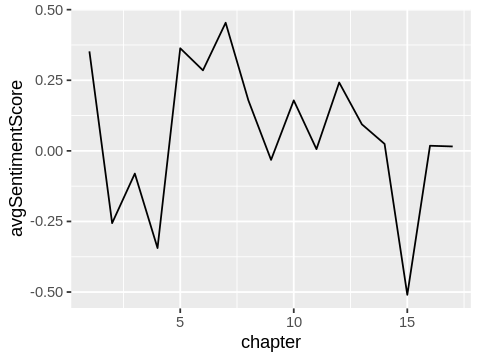

In [21]:
phil_df %>%
  ggplot(aes(x=chapter, y=avgSentimentScore)) +
  geom_line()

From the graph above we can see that the average sentiment per chapter flucutates greatly over the course of the book (and thus there is no clear pattern). Most notably, the average sentiment per chapter greatly increased from chapter 4 to 5 and greatly decreased from chapter 14 to 15.

**1(b)**
Some people say that the Harry Potter books became darker (more negative) over time. Use sentiment analysis to investigate this, and report your conclusion here. (1 point)

**HINT**: A list of all the Harry Potter books can be obtained by looking at the help page for the `harrypotter` package.

In [ ]:
### YOUR SOLUTION HERE

In [22]:
chapters_chamber <- tibble(chapter=seq_along(chamber_of_secrets), 
                   text=chamber_of_secrets) 

words_chamber <- unnest_tokens(chapters_chamber, input=text, output=word) 

chamber_df <- words_chamber %>% 
  inner_join(afinn) %>%
  group_by(chapter) %>%
  summarise(avgSentimentScore = mean(value)) 

chamber_df["book"] = "chamber_of_secrets"

Joining with `by = join_by(word)`


In [23]:
chapters_prisoner <- tibble(chapter=seq_along(prisoner_of_azkaban), 
                   text=prisoner_of_azkaban) 

words_prisoner <- unnest_tokens(chapters_prisoner, input=text, output=word)

prisoner_df <- words_prisoner %>% 
  inner_join(afinn) %>%
  group_by(chapter) %>%
  summarise(avgSentimentScore = mean(value)) 

prisoner_df["book"] = "prisoner_of_azkaban"

Joining with `by = join_by(word)`


In [24]:
chapters_goblet <- tibble(chapter=seq_along(goblet_of_fire), 
                   text=goblet_of_fire) 

words_goblet <- unnest_tokens(chapters_goblet, input=text, output=word)

goblet_df <- words_goblet %>% 
  inner_join(afinn) %>%
  group_by(chapter) %>%
  summarise(avgSentimentScore = mean(value))

goblet_df["book"] = "goblet_of_fire"

Joining with `by = join_by(word)`


In [151]:
chapters_phoenix <- tibble(chapter=seq_along(order_of_the_phoenix), 
                   text=order_of_the_phoenix) 

words_phoenix <- unnest_tokens(chapters_phoenix, input=text, output=word)

phoenix_df <- words_phoenix %>% 
  inner_join(afinn) %>%
  group_by(chapter) %>%
  summarise(avgSentimentScore = mean(value)) 

phoenix_df["book"] = "order_of_the_phoenix"

Joining with `by = join_by(word)`


In [26]:
chapters_blood <- tibble(chapter=seq_along(half_blood_prince), 
                   text=half_blood_prince) 

words_blood <- unnest_tokens(chapters_blood, input=text, output=word)

blood_df <- words_blood %>% 
  inner_join(afinn) %>%
  group_by(chapter) %>%
  summarise(avgSentimentScore = mean(value)) 

blood_df["book"] = "half_blood_prince"

Joining with `by = join_by(word)`


In [27]:
chapters_deathly <- tibble(chapter=seq_along(deathly_hallows), 
                   text=deathly_hallows) 

words_deathly <- unnest_tokens(chapters_deathly, input=text, output=word)

deathly_df <- words_deathly %>% 
  inner_join(afinn) %>%
  group_by(chapter) %>%
  summarise(avgSentimentScore = mean(value)) 

deathly_df["book"] = "deathly_hallows"

Joining with `by = join_by(word)`


In [31]:
all_books <- rbind(phil_df, chamber_df, prisoner_df, goblet_df, phoenix_df, blood_df, deathly_df)

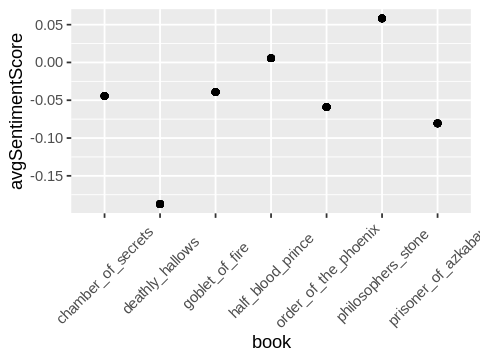

In [69]:
all_books %>%
  group_by(book) %>%
  mutate("avgSentimentScore" = mean(avgSentimentScore)) %>%
  ggplot(aes(x=book, y=avgSentimentScore)) +
  geom_point() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=.5))

It does not appear that harry potter books become darker (more negative) overtime. As we can see from the graph above, there is no clear pattern of avgSentimentScores across books overtime.

**1(c)** According to the sentiment scores, what are the most negative and positive chapters in any of the Harry Potter books? (1 point)

In [65]:
### YOUR SOLUTION HERE

all_books %>%
  group_by(book, chapter) %>%
  arrange(avgSentimentScore) %>%
  head(1)

chapter,avgSentimentScore,book
<int>,<dbl>,<chr>
28,-1.142857,half_blood_prince


In [67]:
all_books %>%
  group_by(book, chapter) %>%
  arrange(avgSentimentScore) %>%
  tail(1)

chapter,avgSentimentScore,book
<int>,<dbl>,<chr>
9,0.6862745,half_blood_prince


The most negative chapter in any Harry Potter books is chapter 28 in "Half Blood Prince." The most positive chapter in any Harry Potter books is chapter 9 in "Half Blood Prince."

**1(d)** Of the sentences that contain three or more scored words, what is the happiest (most positive)? (1 points)

In [80]:
library(tokenizers)

In [117]:
### YOUR SOLUTION HERE

phil <- phil_tbl %>%
  unnest_tokens(input = text, token = "sentences", output = sentence)  %>%
  mutate(sentenceNum = row_number()) %>%
  unnest_tokens(input = sentence, token = "words", output = word) %>%
  inner_join(afinn)

phil["book"] = "philosophers_stone"

Joining with `by = join_by(word)`


In [128]:
chamber <- chapters_chamber %>%
  unnest_tokens(input = text, token = "sentences", output = sentence)  %>%
  mutate(sentenceNum = row_number()) %>%
  unnest_tokens(input = sentence, token = "words", output = word) %>%
  inner_join(afinn)

chamber["book"] = "chamber_of_secrets"

Joining with `by = join_by(word)`


In [119]:
prisoner <- chapters_prisoner %>%
  unnest_tokens(input = text, token = "sentences", output = sentence)  %>%
  mutate(sentenceNum = row_number()) %>%
  unnest_tokens(input = sentence, token = "words", output = word) %>%
  inner_join(afinn)

prisoner["book"] = "prisoner_of_azkaban"

Joining with `by = join_by(word)`


In [121]:
goblet <- chapters_goblet %>%
  unnest_tokens(input = text, token = "sentences", output = sentence)  %>%
  mutate(sentenceNum = row_number()) %>%
  unnest_tokens(input = sentence, token = "words", output = word) %>%
  inner_join(afinn)

goblet["book"] = "goblet_of_fire"

Joining with `by = join_by(word)`


In [122]:
phoenix <- chapters_phoenix %>%
  unnest_tokens(input = text, token = "sentences", output = sentence)  %>%
  mutate(sentenceNum = row_number()) %>%
  unnest_tokens(input = sentence, token = "words", output = word) %>%
  inner_join(afinn)

phoenix["book"] = "order_of_the_phoenix"

Joining with `by = join_by(word)`


In [123]:
blood <- chapters_blood %>%
  unnest_tokens(input = text, token = "sentences", output = sentence)  %>%
  mutate(sentenceNum = row_number()) %>%
  unnest_tokens(input = sentence, token = "words", output = word) %>%
  inner_join(afinn)

blood["book"] = "half_blood_prince"

Joining with `by = join_by(word)`


In [124]:
deathly <- chapters_deathly %>%
  unnest_tokens(input = text, token = "sentences", output = sentence)  %>%
  mutate(sentenceNum = row_number()) %>%
  unnest_tokens(input = sentence, token = "words", output = word) %>%
  inner_join(afinn)

deathly["book"] = "deathly_hallows"

Joining with `by = join_by(word)`


In [129]:
all <- rbind(phil, chamber, prisoner, goblet, phoenix, blood, deathly)

In [161]:
all %>%
  group_by(book, chapter, sentenceNum) %>%
  mutate(wordCountForSentence = n()) %>%
  mutate(avgSentForSentence = mean(value)) %>%
  filter(wordCountForSentence >= 3) %>%
  arrange(-avgSentForSentence) %>%
  head(1)

chapter,sentenceNum,word,value,book,wordCountForSentence,avgSentForSentence
<int>,<int>,<chr>,<dbl>,<chr>,<int>,<dbl>
24,11237,jubilant,3,order_of_the_phoenix,5,3.8


In [162]:
chapters_phoenix %>%
  unnest_tokens(input = text, token = "sentences", output = sentence) %>%
  mutate(sentenceNum = row_number()) %>%
  filter(sentenceNum == 11237) 

chapter,sentence,sentenceNum
<int>,<chr>,<int>
24,"maniacal laughter was ringing in his ears . . . he was happier than he had been in a very long time . . . jubilant, ecstatic, triumphant . . . a wonderful, wonderful thing had happened . . .",11237


Of the sentences that contain three or more scored words, the happiest (most positive) appears in the 11237th sentence in "The Order of the Phoenix." When we find this sentence it contains the text “maniacal laughter was ringing in his ears . . . he was happier than he had been in a very long time . . . jubilant, ecstatic, triumphant . . . a wonderful, wonderful thing had happened . . .”

## Problem 2: Reddit dataset (4 points)
The file `reddit_xmas_2017.RData` contains 100,000 comments posted to Reddit on Christmas Day, 2017. Unless specified otherwise, all matches are case insensitive.

In [164]:
load(url('https://datasets.stats306.org/reddit_xmas_2017.RData'))
reddit %>% print

# A tibble: 100,000 × 3
   author              body                                  created_utc        
   <chr>               <chr>                                 <dttm>             
 1 br_shadow           "Thank you for this, there is a pers… 2017-12-25 15:49:08
 2 Ksalol              "They are not to quick actually. It'… 2017-12-25 17:42:50
 3 itscool83           "tell her you guys should hang out w… 2017-12-25 18:54:13
 4 Glu7enFree          "Autism is a high honor in the tech … 2017-12-25 07:48:17
 5 Theotheogreato      "You thought a cat was your son?! "   2017-12-25 20:58:08
 6 Shadrac121          "Hopfully she takes wat people say i… 2017-12-25 22:27:31
 7 1fzUjhemoSB1QV7zI7  "Si ce propui sa facem cu toata piel… 2017-12-25 07:41:31
 8 MinisterOfEducation "I don't mean to be impolite, but if… 2017-12-25 19:28:35
 9 AabidS10            "i dont have a 720p x265 of it, sorr… 2017-12-25 13:20:32
10 S3RG10              "I'm dying to try Guatemalan sandals… 2017-12-25 00:48:46
# … 

Comment 174 wishes everyone a happy holidays:

In [165]:
reddit %>% slice(174)

author,body,created_utc
<chr>,<chr>,<dttm>
Bareilles,Thank you. Happy holidays everyone!,2017-12-25 01:33:50


**2(a)**  What are other people wishing? Count the first occurrence of the string "Happy `<word>`" or "Merry `<word>`" in the comment body, if any, count the matches. To keep things interesting, do *not* include phrases matching `(happy|merry) (to|with|for|about|and|that|if|i|you|when)`. 

Print a table containing the top 10 matches; a few of the rows are:

<table>
<thead>
    <tr><th scope="col">greeting</th><th scope="col">n</th></tr>
    <tr><th scope="col">&lt;chr&gt;</th><th scope="col">&lt;int&gt;</th></tr>
</thead>
<tbody>
    <tr><td>merry christmas</td><td>2040</td></tr>
    <tr><td>happy holidays </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td> &mdash;</td></tr>
    <tr><td>&mdash;        </td><td>   7</td></tr>
    <tr><td>happy cakeday  </td><td>   6</td></tr>
</tbody>
</table>

Your numbers may vary slightly depending on how you performed the match.

In [278]:
### YOUR SOLUTION HERE

reddit %>%
  mutate(body = str_to_lower(body)) %>%
  mutate(greeting = str_extract(body, regex('(happy|merry).(?!to|with|for|about|and|that|if|i|you|when)\\S\\w+'))) %>%
  drop_na() %>%
  group_by(greeting) %>%
  summarise(n = n()) %>%
  arrange(-n) %>%
  head(10)


greeting,n
<chr>,<int>
merry christmas,2050
happy holidays,480
merry xmas,94
happy christmas,44
happy cake,28
happy birthday,23
happy new,16
happy holiday,13
happy cakeday,6


**2(b)** Find the number of times `christmas`or `xmas` mentioned each hour. Similarly, find the number of mentions per hour of `snow` or `flakes`. Draw a plot comparing these two time series. (1 point)

In [179]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




`summarise()` has grouped output by 'match'. You can override using the
`.groups` argument.


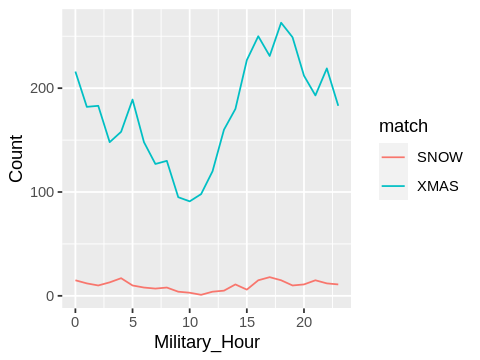

In [213]:
### YOUR SOLUTION HERE

reddit %>%
  mutate(body = str_to_lower(body)) %>%
  mutate(match = case_when(str_detect(body, pattern = '(christmas|xmas)') ~ 'XMAS',
                 str_detect(body, pattern = '(snow|flake)') ~ 'SNOW')) %>%
  filter(match == 'XMAS' | match == 'SNOW') %>%
  group_by(match, Military_Hour=hour(floor_date(created_utc, "1 hour"))) %>%
  summarise(Count = n()) %>%
  ggplot(aes(x = Military_Hour, y = Count, color = match)) +
  geom_line()

**2(c)** On Christmas Day, the word `christmas` occurs 4264 times. What is the next most common word after Christmas, and how many times does it appear? (1 point)

In [236]:
### YOUR SOLUTION HERE

reddit %>%
  mutate(body = str_to_lower(body)) %>%
  unnest_tokens(input=body, output=word) %>%
  group_by(word) %>%
  summarise(count = n()) %>%
  filter(count <= 4264) %>%
  arrange(-count) 

word,count
<chr>,<int>
christmas,4259
only,4151
am,4017
then,3992
been,3929
please,3860
also,3823
www.reddit.com,3786
than,3695


The next most common word is "only" and it appears 4151 times.

**2(d)** Using `afinn` dataset, calculate the average sentiment scores of reddit comments for each hour. When is the most positive time in Christmas Day? (1 point)

In [234]:
### YOUR SOLUTION HERE
#similar to 1b but now grouping by hour

reddit %>%
  mutate(body = str_to_lower(body)) %>%
  unnest_tokens(input=body, output=word) %>%
  inner_join(afinn) %>%
  mutate(Military_Hour=hour(floor_date(created_utc, "1 hour"))) %>%
  group_by(Military_Hour) %>%
  summarise(Mean_Sentiment = mean(value)) %>%
  arrange(-Mean_Sentiment)

Joining with `by = join_by(word)`


Military_Hour,Mean_Sentiment
<int>,<dbl>
4,0.9891790
5,0.9697171
21,0.9642078
14,0.9584906
11,0.9511098
19,0.9363501
13,0.9325351
0,0.9318977
3,0.9298659


The most positive sentiment score on Christmas Day is at 4 AM UTC.

## Challenge Problem: Text Ranking (2 points)
Not all terms/words are equally important, and some carry more information about contents. But how do we measure the importance? One popular method is using TF-IDF (term frequency–inverse document frequency). TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection. Term Frequency measures the relative frequency of term within document. Inverse Document Frequency measures of how much information the word provides for the collection. 

We defined TF-IDF as:
$$\text{TF-IDF} = \operatorname{TF}(t,d) \times \operatorname{IDF}(t)$$
$$\operatorname{TF}(t, d) = \log(1+c(t,d))$$
$$\operatorname{IDF}(t) = 1 + \log(N/k)$$
where $c(t,d)$ is the frequency count of term $t$ in document $d$, $N$ is the total number of documents in the collection, $k$ is the number
of documents containing term $t$


**(a)** Consider the Harry Potter series as a collection of documents(books), find top 5 words in each book ranked by TF-IDF. Comment on your finding. (1 point) 

_Hint_: You can either compute this by hand, using the definitions shown above, or employ built-in functions in the `tidytext` package.

In [279]:
### YOUR SOLUTION HERE

all %>%
  group_by(book) %>%
  count(book, word, sort = TRUE) %>%
  bind_tf_idf(word, book, n) %>%
  arrange(book, -tf_idf) %>%
  top_n(5, tf_idf)

book,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
chamber_of_secrets,stall,12,0.0028017745,1.9459101,0.0054520014
chamber_of_secrets,attacks,17,0.0039691805,0.3364722,0.0013355190
chamber_of_secrets,award,10,0.0023348120,0.5596158,0.0013065977
chamber_of_secrets,expel,5,0.0011674060,0.8472979,0.0009891406
chamber_of_secrets,jaunty,2,0.0004669624,1.9459101,0.0009086669
deathly_hallows,stunning,20,0.0018777580,0.5596158,0.0010508230
deathly_hallows,undesirable,7,0.0006572153,1.2527630,0.0008233350
deathly_hallows,destruction,6,0.0005633274,1.2527630,0.0007057157
deathly_hallows,destroy,22,0.0020655338,0.3364722,0.0006949948


It appears that negative, mysterious, and dark words appear frequently in Harry Potter books. It is also important to note that the code above does not exclude stop words such as "the" which can impact results.

**(b)** Stop words are a set of commonly used words in a language like "the", "of", "and", "to", "a". The `stop_words` table contains a list of such words. If you ignore all the words in `stop_words`, what are the top 10 words (again ranked by TF-IDF) in each Harry Potter book? (1 point)

_Hint_: use `anti_join` to exclude words in `stop_words`.

In [281]:
### YOUR SOLUTION HERE

all %>%
  anti_join(stop_words, by = "word") %>%
  group_by(book) %>%
  count(book, word, sort = TRUE) %>%
  bind_tf_idf(word, book, n) %>%
  arrange(book, -tf_idf) %>%
  top_n(10, tf_idf)

book,word,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
chamber_of_secrets,stall,12,0.0037128713,1.9459101,0.0072249139
chamber_of_secrets,attacks,17,0.0052599010,0.3364722,0.0017698107
chamber_of_secrets,award,10,0.0030940594,0.5596158,0.0017314845
chamber_of_secrets,expel,5,0.0015470297,0.8472979,0.0013107950
chamber_of_secrets,jaunty,2,0.0006188119,1.9459101,0.0012041523
chamber_of_secrets,crazy,5,0.0015470297,0.5596158,0.0008657422
chamber_of_secrets,solved,3,0.0009282178,0.8472979,0.0007864770
chamber_of_secrets,suspend,2,0.0006188119,1.2527630,0.0007752246
chamber_of_secrets,fan,7,0.0021658416,0.3364722,0.0007287456
